### Επίδραση του Αριθμού των Δωρεάν Αδειών στα Κέρδη και άλλες Μεταβλητές των Επιχειρήσεων

**Πείραμα:**
- Emission cap = 80% BAU emissions
- 6 εταιρείες
- 2 τομείς
  - Ο 1ος τομέας έχει **πολύ μεγάλο** μέγεθος σε όρους πωλήσεων

**Διαδικασία:**
Δίνουμε σταδιακά περισσότερες δωρεάν άδειες στις 3 εταιρείες του 1ου τομέα και παρατηρούμε τις επιπτώσεις στα κέρδη και άλλες μεταβλητές. Στον 2ο τομέα, δεν δίνονται δωρεάν άδειες.

- Δωρεάν άδειες στον 1ο τομέα: από 0 έως την ποσότητα παραγωγής (q).


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from funkwpap import *
import sympy as sp, pandas as pd, numpy as np, tqdm, time, sys, matplotlib.pyplot as plt, tqdm
from statistics import mean
from scipy.optimize import fsolve
from random import random


In [2]:
x = sp.symbols('x')
cap = 200 # total emission cap
Regulator20 = Regulator("Regulator20", permit_price = 2.4079, emission_cap = cap)
sector1 = Sector('cement', price_demand_function= 900 - 0.3*x, free_emission_multiplier= 0, regulator= Regulator20)
sector2 = Sector('steel', price_demand_function=150 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator20)

country3 = Country('GR', size= 0.1, regulator= Regulator20)

# Create Firms using objects
firm1 = Firm('firm1', 1, 1, x*0, 10*x+ 2*x**2 + 0.1*x**3 , 0, 0, 0, regulator= Regulator20)
firm2 = Firm('firm2', 1, 2, x*0, 11*x+ 3*x**2 + 0.2*x**3, 0, 0, 0, regulator= Regulator20)
firm3 = Firm('firm3', 1, 3, x*0, 5*x+ 4*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator20)
firm4 = Firm('firm4', 2, 1, x*0, 7*x+ 5*x**2 + 6*x**3 , 0, 0, 0, regulator= Regulator20)
firm5 = Firm('firm5', 2, 2, x*0, 1*x+ 6*x**2 + 7*x**3 , 0, 0, 0, regulator= Regulator20)
firm6 = Firm('firm6', 2, 3, x*0, 2*x+ 7*x**2 + 8*x**3 , 0, 0, 0, regulator= Regulator20)

In [3]:
Regulator20.BAU_calculator()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-14


In [5]:
Regulator20.emission_cap = Regulator20.BAU_emissions * 0.8

frees = np.linspace(0, 1, 100)

profits1 = []
profits2 = []
abatements1 = []
abatements2 = []
trades1 = []
trades2 = []
revenews1 = []
revenews2 = []
permit_price = []
outputs1 = []
outputs2 = []
emissions1 = []
emissions2 = []
permits_bought_1 = []
permits_bought_2 = []
permits_free_1 = []
permits_free_2 = []
permits_used_1 = []
permits_used_2 = []


for free in tqdm.tqdm(frees):
    
    
    sector1.free_emission_multiplier = free
    Regulator20.optimization_with_least_squares_ab()
    print(f"{free}: {Regulator20.equilibrium_tester(output = True)}")

    for firm in Regulator20.firm_registry.values():
        firm.calculate_profit_components()

    profits1.append(mean( float(i.profit) for i in sector1.firms))
    profits2.append(mean( float(i.profit) for i in sector2.firms))
    abatements1.append(mean( float(i.abatement) for i in sector1.firms))
    abatements2.append(mean( float(i.abatement) for i in sector2.firms))
    permits_used_1.append(mean( float(i.permits_used) for i in sector1.firms))
    permits_used_2.append(mean( float(i.permits_used) for i in sector2.firms))
    permits_free_1.append(mean( float(i.free_permits) for i in sector1.firms))
    permits_free_2.append(mean( float(i.free_permits) for i in sector2.firms))
    permits_bought_1.append(mean( float(i.permits_bought) for i in sector1.firms))
    permits_bought_2.append(mean( float(i.permits_bought) for i in sector2.firms))
    trades1.append(mean( float(i.permits_costs) for i in sector1.firms))
    trades2.append(mean( float(i.permits_costs) for i in sector2.firms))
    revenews1.append( mean(float(i.sales) for i in sector1.firms))
    revenews2.append(mean( float(i.sales) for i in sector2.firms))
    permit_price.append(Regulator20.permit_price)
    outputs1.append(mean( float(i.actual_output) for i in sector1.firms))
    outputs2.append(mean( float(i.actual_output) for i in sector2.firms))
    emissions1.append(mean( float(i.emission) for i in sector1.firms))
    emissions2.append(mean( float(i.emission) for i in sector2.firms))   

  1%|          | 1/100 [00:02<03:18,  2.01s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.0831 ✔️ |   -9.6831 ✔️ |   +5.4499 ✔️ | 5/5
0.0: (True, 8.05201977485126e-5)


  2%|▏         | 2/100 [00:04<03:37,  2.22s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.0938 ✔️ |   -9.6938 ✔️ |   +5.4563 ✔️ | 5/5
0.010101010101010102: (True, 8.05194216582095e-5)


  3%|▎         | 3/100 [00:06<03:42,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.1045 ✔️ |   -9.7045 ✔️ |   +5.4627 ✔️ | 5/5
0.020202020202020204: (True, 8.05046729865921e-5)


  4%|▍         | 4/100 [00:09<03:45,  2.35s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.1152 ✔️ |   -9.7152 ✔️ |   +5.4691 ✔️ | 5/5
0.030303030303030304: (True, 8.05047858918329e-5)


  5%|▌         | 5/100 [00:11<03:40,  2.32s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.1260 ✔️ |   -9.7260 ✔️ |   +5.4756 ✔️ | 5/5
0.04040404040404041: (True, 8.05045441154562e-5)


  6%|▌         | 6/100 [00:13<03:42,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.1369 ✔️ |   -9.7369 ✔️ |   +5.4821 ✔️ | 5/5
0.05050505050505051: (True, 8.05039775144678e-5)


  7%|▋         | 7/100 [00:16<03:38,  2.35s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.1477 ✔️ |   -9.7477 ✔️ |   +5.4886 ✔️ | 5/5
0.06060606060606061: (True, 8.05038969389216e-5)


  8%|▊         | 8/100 [00:18<03:32,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.1586 ✔️ |   -9.7586 ✔️ |   +5.4952 ✔️ | 5/5
0.07070707070707072: (True, 8.05038490696575e-5)


  9%|▉         | 9/100 [00:20<03:30,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.1696 ✔️ |   -9.7696 ✔️ |   +5.5018 ✔️ | 5/5
0.08080808080808081: (True, 8.05038204987341e-5)


 10%|█         | 10/100 [00:23<03:31,  2.35s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.1806 ✔️ |   -9.7806 ✔️ |   +5.5084 ✔️ | 5/5
0.09090909090909091: (True, 8.05076012042605e-5)


 11%|█         | 11/100 [00:25<03:30,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.1916 ✔️ |   -9.7916 ✔️ |   +5.5150 ✔️ | 5/5
0.10101010101010102: (True, 8.05073397387446e-5)


 12%|█▏        | 12/100 [00:28<03:30,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.2027 ✔️ |   -9.8027 ✔️ |   +5.5216 ✔️ | 5/5
0.11111111111111112: (True, 8.05072053751132e-5)


 13%|█▎        | 13/100 [00:30<03:28,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.2139 ✔️ |   -9.8139 ✔️ |   +5.5283 ✔️ | 5/5
0.12121212121212122: (True, 8.05070700948818e-5)


 14%|█▍        | 14/100 [00:32<03:26,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.2250 ✔️ |   -9.8250 ✔️ |   +5.5350 ✔️ | 5/5
0.13131313131313133: (True, 8.05073017247082e-5)


 15%|█▌        | 15/100 [00:35<03:21,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.2362 ✔️ |   -9.8362 ✔️ |   +5.5417 ✔️ | 5/5
0.14141414141414144: (True, 8.05071672829172e-5)


 16%|█▌        | 16/100 [00:37<03:18,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.2475 ✔️ |   -9.8475 ✔️ |   +5.5485 ✔️ | 5/5
0.15151515151515152: (True, 8.05070286133969e-5)
Optimal solution found


 17%|█▋        | 17/100 [00:40<03:22,  2.44s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.2588 ✔️ |   -9.8588 ✔️ |   +5.5553 ✔️ | 5/5
0.16161616161616163: (True, 8.05069680467341e-5)


 18%|█▊        | 18/100 [00:42<03:17,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.2701 ✔️ |   -9.8701 ✔️ |   +5.5621 ✔️ | 5/5
0.17171717171717174: (True, 8.05069414298032e-5)


 19%|█▉        | 19/100 [00:44<03:13,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.2815 ✔️ |   -9.8815 ✔️ |   +5.5689 ✔️ | 5/5
0.18181818181818182: (True, 8.05067539602078e-5)


 20%|██        | 20/100 [00:47<03:12,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.2930 ✔️ |   -9.8930 ✔️ |   +5.5758 ✔️ | 5/5
0.19191919191919193: (True, 8.05066714875124e-5)


 21%|██        | 21/100 [00:49<03:10,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.3045 ✔️ |   -9.9045 ✔️ |   +5.5827 ✔️ | 5/5
0.20202020202020204: (True, 8.05062550739422e-5)


 22%|██▏       | 22/100 [00:52<03:10,  2.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.3160 ✔️ |   -9.9160 ✔️ |   +5.5896 ✔️ | 5/5
0.21212121212121213: (True, 8.05067753191224e-5)


 23%|██▎       | 23/100 [00:54<03:10,  2.48s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.3276 ✔️ |   -9.9276 ✔️ |   +5.5965 ✔️ | 5/5
0.22222222222222224: (True, 8.05066643181362e-5)


 24%|██▍       | 24/100 [00:57<03:10,  2.50s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.3392 ✔️ |   -9.9392 ✔️ |   +5.6035 ✔️ | 5/5
0.23232323232323235: (True, 8.05068735161285e-5)


 25%|██▌       | 25/100 [00:59<03:04,  2.46s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.3509 ✔️ |   -9.9509 ✔️ |   +5.6105 ✔️ | 5/5
0.24242424242424243: (True, 8.05067611722166e-5)


 26%|██▌       | 26/100 [01:02<03:00,  2.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.3626 ✔️ |   -9.9626 ✔️ |   +5.6175 ✔️ | 5/5
0.25252525252525254: (True, 8.05271618347092e-5)


 27%|██▋       | 27/100 [01:04<03:01,  2.49s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.3743 ✔️ |   -9.9743 ✔️ |   +5.6246 ✔️ | 5/5
0.26262626262626265: (True, 8.05268058456932e-5)


 28%|██▊       | 28/100 [01:07<02:59,  2.49s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.3861 ✔️ |   -9.9861 ✔️ |   +5.6317 ✔️ | 5/5
0.27272727272727276: (True, 8.05264655241444e-5)


 29%|██▉       | 29/100 [01:09<02:55,  2.47s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.3980 ✔️ |   -9.9980 ✔️ |   +5.6388 ✔️ | 5/5
0.2828282828282829: (True, 8.05261520895328e-5)


 30%|███       | 30/100 [01:12<02:53,  2.48s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.4099 ✔️ |  -10.0099 ✔️ |   +5.6459 ✔️ | 5/5
0.29292929292929293: (True, 8.05256664619947e-5)


 31%|███       | 31/100 [01:14<02:49,  2.45s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.4219 ✔️ |  -10.0219 ✔️ |   +5.6531 ✔️ | 5/5
0.30303030303030304: (True, 8.05251828737141e-5)


 32%|███▏      | 32/100 [01:17<02:48,  2.48s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.4339 ✔️ |  -10.0339 ✔️ |   +5.6603 ✔️ | 5/5
0.31313131313131315: (True, 8.05246401895943e-5)


 33%|███▎      | 33/100 [01:19<02:44,  2.45s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.4459 ✔️ |  -10.0459 ✔️ |   +5.6675 ✔️ | 5/5
0.32323232323232326: (True, 8.05241791752564e-5)


 34%|███▍      | 34/100 [01:21<02:37,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.4580 ✔️ |  -10.0580 ✔️ |   +5.6748 ✔️ | 5/5
0.33333333333333337: (True, 8.05237295367078e-5)


 35%|███▌      | 35/100 [01:23<02:31,  2.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.4702 ✔️ |  -10.0702 ✔️ |   +5.6821 ✔️ | 5/5
0.3434343434343435: (True, 8.05232880054518e-5)


 36%|███▌      | 36/100 [01:26<02:28,  2.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.4824 ✔️ |  -10.0824 ✔️ |   +5.6894 ✔️ | 5/5
0.3535353535353536: (True, 8.05255979301478e-5)


 37%|███▋      | 37/100 [01:28<02:26,  2.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.4946 ✔️ |  -10.0946 ✔️ |   +5.6968 ✔️ | 5/5
0.36363636363636365: (True, 8.05251773172699e-5)


 38%|███▊      | 38/100 [01:30<02:21,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.5069 ✔️ |  -10.1069 ✔️ |   +5.7042 ✔️ | 5/5
0.37373737373737376: (True, 8.05247573225643e-5)


 39%|███▉      | 39/100 [01:32<02:18,  2.28s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.5193 ✔️ |  -10.1193 ✔️ |   +5.7116 ✔️ | 5/5
0.38383838383838387: (True, 8.05243497197239e-5)


 40%|████      | 40/100 [01:35<02:17,  2.28s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.5317 ✔️ |  -10.1317 ✔️ |   +5.7190 ✔️ | 5/5
0.393939393939394: (True, 8.05239613583808e-5)


 41%|████      | 41/100 [01:37<02:15,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.5442 ✔️ |  -10.1442 ✔️ |   +5.7265 ✔️ | 5/5
0.4040404040404041: (True, 8.05235629783851e-5)


 42%|████▏     | 42/100 [01:40<02:15,  2.34s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.5567 ✔️ |  -10.1567 ✔️ |   +5.7340 ✔️ | 5/5
0.4141414141414142: (True, 8.05069756921739e-5)


 43%|████▎     | 43/100 [01:42<02:14,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.5692 ✔️ |  -10.1692 ✔️ |   +5.7415 ✔️ | 5/5
0.42424242424242425: (True, 8.05068355731464e-5)


 44%|████▍     | 44/100 [01:45<02:16,  2.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.5818 ✔️ |  -10.1818 ✔️ |   +5.7491 ✔️ | 5/5
0.43434343434343436: (True, 8.05066981399705e-5)


 45%|████▌     | 45/100 [01:47<02:12,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.5945 ✔️ |  -10.1945 ✔️ |   +5.7567 ✔️ | 5/5
0.4444444444444445: (True, 8.05065252578174e-5)


 46%|████▌     | 46/100 [01:49<02:10,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.6072 ✔️ |  -10.2072 ✔️ |   +5.7643 ✔️ | 5/5
0.4545454545454546: (True, 8.05055509403019e-5)


 47%|████▋     | 47/100 [01:52<02:07,  2.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.6200 ✔️ |  -10.2200 ✔️ |   +5.7720 ✔️ | 5/5
0.4646464646464647: (True, 8.05054530061966e-5)


 48%|████▊     | 48/100 [01:54<02:06,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.6329 ✔️ |  -10.2329 ✔️ |   +5.7797 ✔️ | 5/5
0.4747474747474748: (True, 8.05053848935700e-5)


 49%|████▉     | 49/100 [01:57<02:02,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.6458 ✔️ |  -10.2458 ✔️ |   +5.7875 ✔️ | 5/5
0.48484848484848486: (True, 8.05052984063082e-5)


 50%|█████     | 50/100 [01:59<02:01,  2.43s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.6587 ✔️ |  -10.2587 ✔️ |   +5.7952 ✔️ | 5/5
0.494949494949495: (True, 8.05052169425835e-5)


 51%|█████     | 51/100 [02:01<01:58,  2.43s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.6717 ✔️ |  -10.2717 ✔️ |   +5.8030 ✔️ | 5/5
0.5050505050505051: (True, 8.05064791578047e-5)


 52%|█████▏    | 52/100 [02:04<01:55,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.6848 ✔️ |  -10.2848 ✔️ |   +5.8109 ✔️ | 5/5
0.5151515151515152: (True, 8.05063420443730e-5)


 53%|█████▎    | 53/100 [02:06<01:51,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.6979 ✔️ |  -10.2979 ✔️ |   +5.8187 ✔️ | 5/5
0.5252525252525253: (True, 8.05062153546032e-5)


 54%|█████▍    | 54/100 [02:08<01:48,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.7110 ✔️ |  -10.3110 ✔️ |   +5.8266 ✔️ | 5/5
0.5353535353535354: (True, 8.05036891549094e-5)


 55%|█████▌    | 55/100 [02:11<01:46,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.7243 ✔️ |  -10.3243 ✔️ |   +5.8346 ✔️ | 5/5
0.5454545454545455: (True, 8.05036036126694e-5)


 56%|█████▌    | 56/100 [02:13<01:46,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.7376 ✔️ |  -10.3376 ✔️ |   +5.8425 ✔️ | 5/5
0.5555555555555556: (True, 8.05064104127950e-5)


 57%|█████▋    | 57/100 [02:16<01:42,  2.38s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.7509 ✔️ |  -10.3509 ✔️ |   +5.8505 ✔️ | 5/5
0.5656565656565657: (True, 8.05062098478970e-5)


 58%|█████▊    | 58/100 [02:18<01:39,  2.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.7643 ✔️ |  -10.3643 ✔️ |   +5.8586 ✔️ | 5/5
0.5757575757575758: (True, 8.05058966335537e-5)


 59%|█████▉    | 59/100 [02:20<01:35,  2.34s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.7778 ✔️ |  -10.3778 ✔️ |   +5.8667 ✔️ | 5/5
0.5858585858585859: (True, 8.05057295636402e-5)


 60%|██████    | 60/100 [02:23<01:33,  2.34s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.7913 ✔️ |  -10.3913 ✔️ |   +5.8748 ✔️ | 5/5
0.595959595959596: (True, 8.05055880377381e-5)


 61%|██████    | 61/100 [02:25<01:30,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.8049 ✔️ |  -10.4049 ✔️ |   +5.8829 ✔️ | 5/5
0.6060606060606061: (True, 8.05055150365774e-5)


 62%|██████▏   | 62/100 [02:27<01:26,  2.28s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.8185 ✔️ |  -10.4185 ✔️ |   +5.8911 ✔️ | 5/5
0.6161616161616162: (True, 8.05053339618667e-5)


 63%|██████▎   | 63/100 [02:29<01:23,  2.26s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.8322 ✔️ |  -10.4322 ✔️ |   +5.8993 ✔️ | 5/5
0.6262626262626263: (True, 8.05051664229950e-5)


 64%|██████▍   | 64/100 [02:32<01:22,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.8460 ✔️ |  -10.4460 ✔️ |   +5.9076 ✔️ | 5/5
0.6363636363636365: (True, 8.05050463554835e-5)


 65%|██████▌   | 65/100 [02:34<01:22,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.8598 ✔️ |  -10.4598 ✔️ |   +5.9159 ✔️ | 5/5
0.6464646464646465: (True, 8.05048869167990e-5)


 66%|██████▌   | 66/100 [02:36<01:18,  2.30s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.8737 ✔️ |  -10.4737 ✔️ |   +5.9242 ✔️ | 5/5
0.6565656565656566: (True, 8.05052503380921e-5)


 67%|██████▋   | 67/100 [02:39<01:15,  2.28s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.8877 ✔️ |  -10.4877 ✔️ |   +5.9326 ✔️ | 5/5
0.6666666666666667: (True, 8.05106642189912e-5)


 68%|██████▊   | 68/100 [02:41<01:14,  2.32s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.9017 ✔️ |  -10.5017 ✔️ |   +5.9410 ✔️ | 5/5
0.6767676767676768: (True, 8.05102762626575e-5)


 69%|██████▉   | 69/100 [02:43<01:11,  2.30s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.9157 ✔️ |  -10.5157 ✔️ |   +5.9494 ✔️ | 5/5
0.686868686868687: (True, 8.05098995826370e-5)


 70%|███████   | 70/100 [02:46<01:09,  2.32s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.9299 ✔️ |  -10.5299 ✔️ |   +5.9579 ✔️ | 5/5
0.696969696969697: (True, 8.05095589342386e-5)


 71%|███████   | 71/100 [02:48<01:06,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.9441 ✔️ |  -10.5441 ✔️ |   +5.9665 ✔️ | 5/5
0.7070707070707072: (True, 8.05091403748293e-5)


 72%|███████▏  | 72/100 [02:50<01:05,  2.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.9584 ✔️ |  -10.5584 ✔️ |   +5.9750 ✔️ | 5/5
0.7171717171717172: (True, 8.05088993445224e-5)


 73%|███████▎  | 73/100 [02:52<01:02,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.9727 ✔️ |  -10.5727 ✔️ |   +5.9836 ✔️ | 5/5
0.7272727272727273: (True, 8.05091451994144e-5)


 74%|███████▍  | 74/100 [02:55<00:59,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |   -9.9871 ✔️ |  -10.5871 ✔️ |   +5.9923 ✔️ | 5/5
0.7373737373737375: (True, 8.05085726724997e-5)


 75%|███████▌  | 75/100 [02:57<00:56,  2.27s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.0016 ✔️ |  -10.6016 ✔️ |   +6.0010 ✔️ | 5/5
0.7474747474747475: (True, 8.05083822612573e-5)


 76%|███████▌  | 76/100 [02:59<00:55,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.0161 ✔️ |  -10.6161 ✔️ |   +6.0097 ✔️ | 5/5
0.7575757575757577: (True, 8.05079340224779e-5)


 77%|███████▋  | 77/100 [03:02<00:53,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.0307 ✔️ |  -10.6307 ✔️ |   +6.0184 ✔️ | 5/5
0.7676767676767677: (True, 8.05078682688531e-5)


 78%|███████▊  | 78/100 [03:04<00:51,  2.32s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.0454 ✔️ |  -10.6454 ✔️ |   +6.0272 ✔️ | 5/5
0.7777777777777778: (True, 8.05078297574369e-5)


 79%|███████▉  | 79/100 [03:06<00:48,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.0601 ✔️ |  -10.6601 ✔️ |   +6.0361 ✔️ | 5/5
0.787878787878788: (True, 8.05075969623203e-5)


 80%|████████  | 80/100 [03:09<00:46,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.0750 ✔️ |  -10.6750 ✔️ |   +6.0450 ✔️ | 5/5
0.797979797979798: (True, 8.05073816891877e-5)


 81%|████████  | 81/100 [03:11<00:44,  2.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.0898 ✔️ |  -10.6898 ✔️ |   +6.0539 ✔️ | 5/5
0.8080808080808082: (True, 8.05072413001540e-5)


 82%|████████▏ | 82/100 [03:13<00:42,  2.35s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.1048 ✔️ |  -10.7048 ✔️ |   +6.0629 ✔️ | 5/5
0.8181818181818182: (True, 8.05070356406645e-5)


 83%|████████▎ | 83/100 [03:16<00:39,  2.34s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.1198 ✔️ |  -10.7198 ✔️ |   +6.0719 ✔️ | 5/5
0.8282828282828284: (True, 8.05068344789106e-5)


 84%|████████▍ | 84/100 [03:18<00:37,  2.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.1349 ✔️ |  -10.7349 ✔️ |   +6.0809 ✔️ | 5/5
0.8383838383838385: (True, 8.05066810656285e-5)


 85%|████████▌ | 85/100 [03:20<00:34,  2.30s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.1501 ✔️ |  -10.7501 ✔️ |   +6.0901 ✔️ | 5/5
0.8484848484848485: (True, 8.05064843234504e-5)


 86%|████████▌ | 86/100 [03:22<00:32,  2.30s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.1653 ✔️ |  -10.7653 ✔️ |   +6.0992 ✔️ | 5/5
0.8585858585858587: (True, 8.05063457391952e-5)


 87%|████████▋ | 87/100 [03:25<00:29,  2.30s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.1806 ✔️ |  -10.7806 ✔️ |   +6.1084 ✔️ | 5/5
0.8686868686868687: (True, 8.05061115869421e-5)


 88%|████████▊ | 88/100 [03:27<00:27,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.1960 ✔️ |  -10.7960 ✔️ |   +6.1176 ✔️ | 5/5
0.8787878787878789: (True, 8.05058598345454e-5)


 89%|████████▉ | 89/100 [03:29<00:25,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.2115 ✔️ |  -10.8115 ✔️ |   +6.1269 ✔️ | 5/5
0.888888888888889: (True, 8.05053268067013e-5)


 90%|█████████ | 90/100 [03:32<00:22,  2.26s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.2270 ✔️ |  -10.8270 ✔️ |   +6.1362 ✔️ | 5/5
0.8989898989898991: (True, 8.05051545498259e-5)


 91%|█████████ | 91/100 [03:34<00:20,  2.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.2426 ✔️ |  -10.8426 ✔️ |   +6.1456 ✔️ | 5/5
0.9090909090909092: (True, 8.05049724874607e-5)
Optimal solution found


 92%|█████████▏| 92/100 [03:37<00:19,  2.43s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.2583 ✔️ |  -10.8583 ✔️ |   +6.1550 ✔️ | 5/5
0.9191919191919192: (True, 8.05047343419574e-5)


 93%|█████████▎| 93/100 [03:39<00:16,  2.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.2741 ✔️ |  -10.8741 ✔️ |   +6.1645 ✔️ | 5/5
0.9292929292929294: (True, 8.05045578502472e-5)


 94%|█████████▍| 94/100 [03:41<00:14,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.2899 ✔️ |  -10.8899 ✔️ |   +6.1740 ✔️ | 5/5
0.9393939393939394: (True, 8.05044572373959e-5)


 95%|█████████▌| 95/100 [03:43<00:11,  2.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.3059 ✔️ |  -10.9059 ✔️ |   +6.1835 ✔️ | 5/5
0.9494949494949496: (True, 8.05043865739208e-5)


 96%|█████████▌| 96/100 [03:46<00:09,  2.34s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.3219 ✔️ |  -10.9219 ✔️ |   +6.1931 ✔️ | 5/5
0.9595959595959597: (True, 8.05043479346068e-5)


 97%|█████████▋| 97/100 [03:48<00:06,  2.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.3379 ✔️ |  -10.9379 ✔️ |   +6.2028 ✔️ | 5/5
0.9696969696969697: (True, 8.05042405573886e-5)


 98%|█████████▊| 98/100 [03:51<00:04,  2.36s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.3541 ✔️ |  -10.9541 ✔️ |   +6.2125 ✔️ | 5/5
0.9797979797979799: (True, 8.05040519651357e-5)


 99%|█████████▉| 99/100 [03:53<00:02,  2.41s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.05e-5 ✔️ |  +8.05e-5 ✔️ |  -10.3703 ✔️ |  -10.9703 ✔️ |   +6.2222 ✔️ | 5/5
0.98989898989899: (True, 8.05039633462457e-5)


100%|██████████| 100/100 [03:56<00:00,  2.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.81e-5 ✔️ |  +2.70e-5 ✔️ |  -10.3867 ✔️ |  -10.9867 ✔️ |   +6.2320 ✔️ | 5/5
1.0: (True, 8.80698801175583e-5)


100%|██████████| 100/100 [03:56<00:00,  2.36s/it]


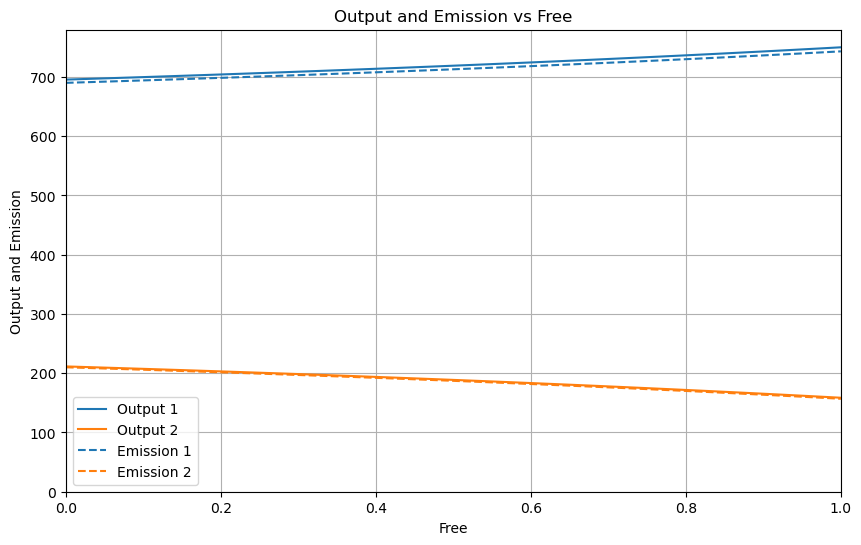

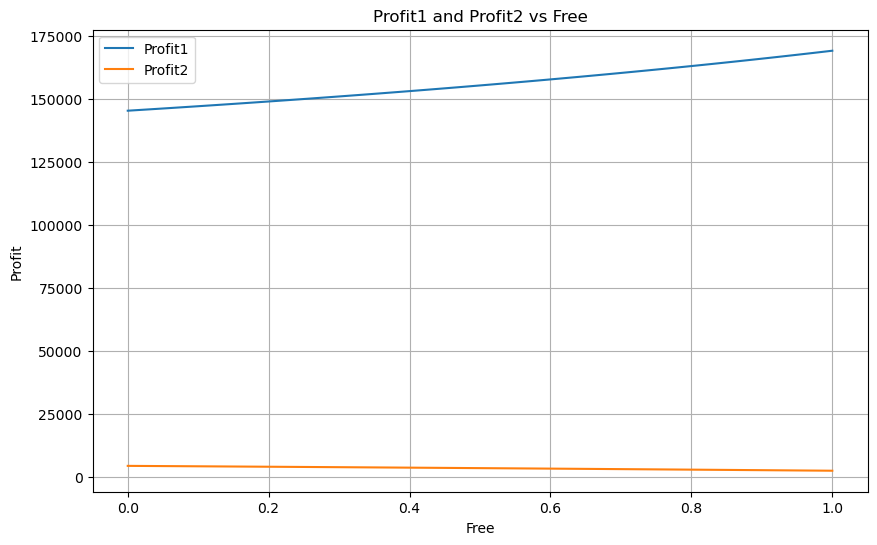

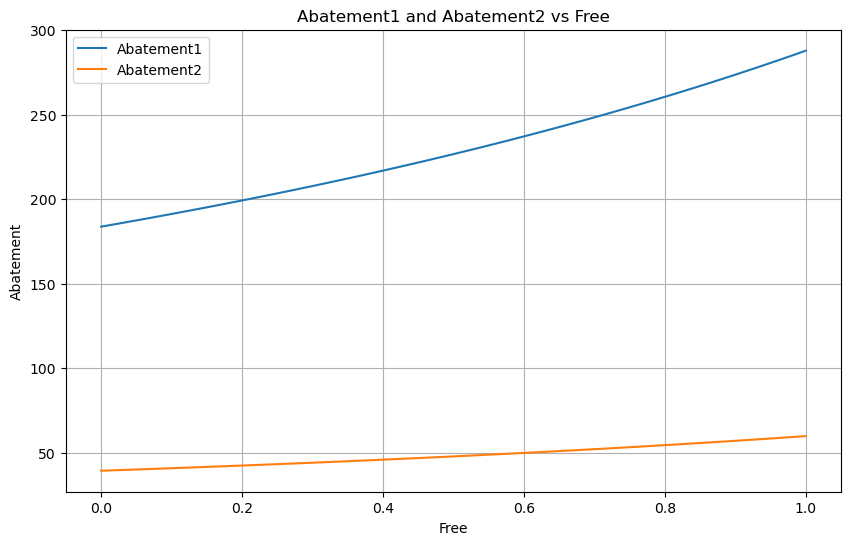

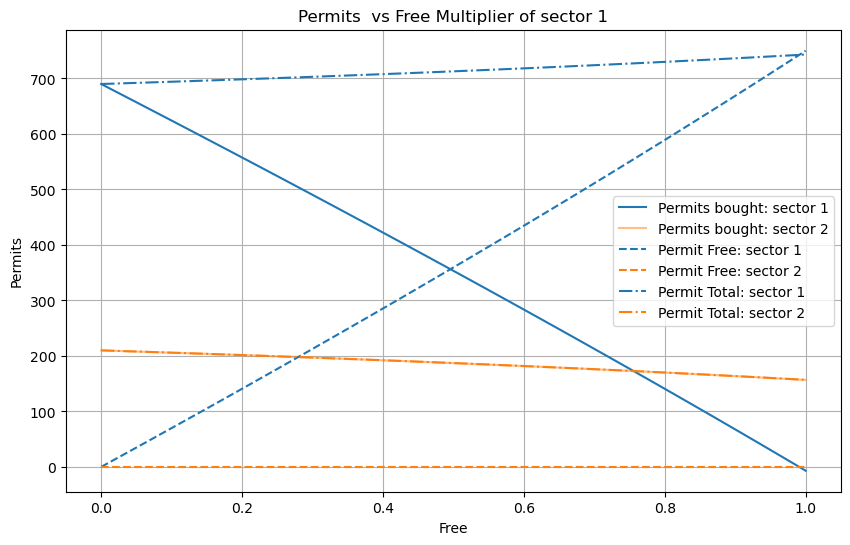

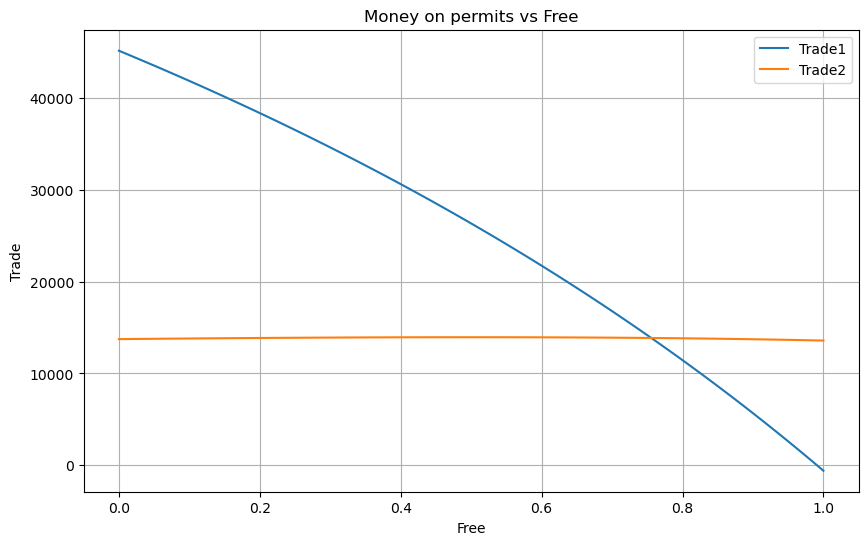

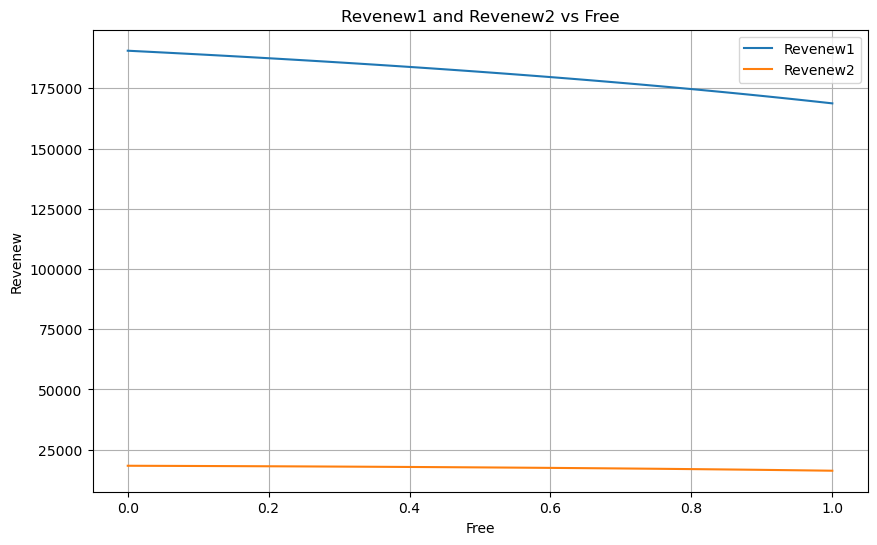

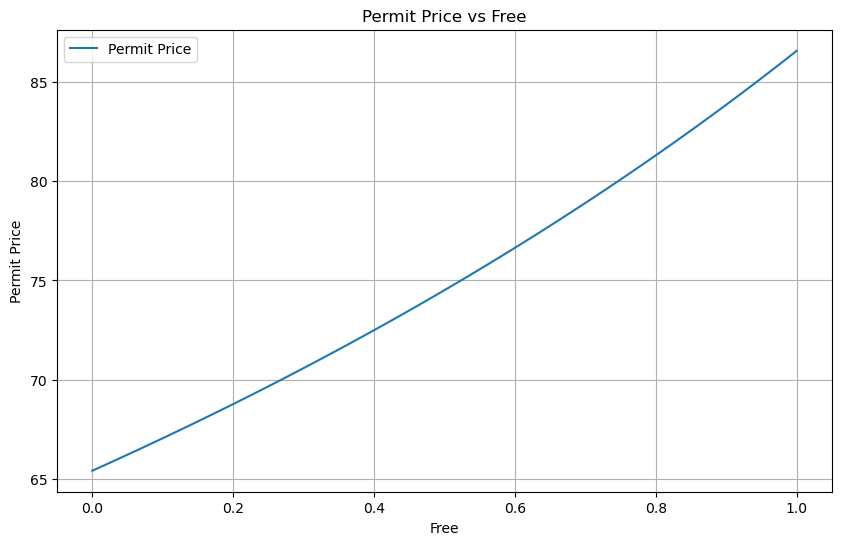

In [7]:
colors = {'b': '#1f77b4', 'o': '#ff7f0e'}
# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, outputs1, label='Output 1', color = '#1f77b4')
plt.plot(frees, outputs2, label='Output 2', color = '#ff7f0e')
plt.plot(frees, emissions1, label='Emission 1', linestyle='--', color = '#1f77b4')
plt.plot(frees, emissions2, label='Emission 2', linestyle='--', color = '#ff7f0e')
plt.xlabel('Free')
plt.ylabel('Output and Emission')
plt.title('Output and Emission vs Free')
plt.legend()
plt.grid()
# Set the limits for the x and y axes
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.show()

# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, profits1, label='Profit1')
plt.plot(frees, profits2, label='Profit2')
plt.xlabel('Free')
plt.ylabel('Profit')
plt.title('Profit1 and Profit2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot abatement1 and abatement2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, abatements1, label='Abatement1')
plt.plot(frees, abatements2, label='Abatement2')
plt.xlabel('Free')
plt.ylabel('Abatement')
plt.title('Abatement1 and Abatement2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit1 and permit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permits_bought_1, label='Permits bought: sector 1', color = colors['b'])
plt.plot(frees, permits_bought_2, label='Permits bought: sector 2', color = colors['o'], alpha=0.5)
plt.plot(frees, permits_free_1, label='Permit Free: sector 1', color = colors['b'], linestyle='--')
plt.plot(frees, permits_free_2, label='Permit Free: sector 2', color = colors['o'], linestyle='--')
plt.plot(frees, permits_used_1, label='Permit Total: sector 1', color = colors['b'], linestyle='-.')
plt.plot(frees, permits_used_2, label='Permit Total: sector 2', color = colors['o'], linestyle='-.')
plt.xlabel('Free')
plt.ylabel('Permits')
plt.title('Permits  vs Free Multiplier of sector 1')
plt.legend()
plt.grid()
plt.show()

# Plot trade1 and trade2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, trades1, label='Trade1')
plt.plot(frees, trades2, label='Trade2')
plt.xlabel('Free')
plt.ylabel('Trade')
plt.title('Money on permits vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot revenew1 and revenew2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, revenews1, label='Revenew1')
plt.plot(frees, revenews2, label='Revenew2')
plt.xlabel('Free')
plt.ylabel('Revenew')
plt.title('Revenew1 and Revenew2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit_price with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permit_price, label='Permit Price')
plt.xlabel('Free')
plt.ylabel('Permit Price')
plt.title('Permit Price vs Free')
plt.legend()
plt.grid()
plt.show()